<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-0.000322,220.230846,220.231146,-0.000300
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.000183,213.358327,213.358062,0.000265
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-0.004792,176.439332,176.444395,-0.005063
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,0.000482,270.231635,270.231171,0.000465
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-0.000679,236.458005,236.459100,-0.001095
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,0.000429,267.724867,267.724513,0.000354
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.000175,257.885530,257.885337,0.000193
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,0.002165,271.219816,271.218106,0.001711
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,0.001639,248.744703,248.743769,0.000934


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.500502  63.717616  22.076127  71.936923 -0.000322  220.230846   
      1.0    70.427858  55.690492  35.325084  41.914709  0.000183  213.358327   
      2.0    73.458656  22.899774  40.373637  29.712057 -0.004792  176.439332   
      3.0    45.076725  61.155039  79.799378  74.200011  0.000482  270.231635   
      4.0    24.393520  41.813749  63.638355  96.613061 -0.000679  236.458005   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064  0.000429  267.724867   
      246.0  72.687231  37.296268  91.549318  46.352887 -0.000175  257.885530   
      247.0  76.548069  68.956671  49.307235  66.405676  0.002165  271.219816   
      248.0  94.246148  56.488447  32.839337  55.169132  0.001639  248.744703   
      249.0  33.964959  53.663217  73.017981  22.059349 -0.001897  192.703608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.231146 -0.000300  
      1.0    213.358062  0.000265  
      2.0    176.444395 -0.005063  
      3.0    270.231171  0.000465  
      4.0    236.459100 -0.001095  
...                 ...       ...  
999.0 245.0  267.724513  0.000354  
      246.0  257.885337  0.000193  
      247.0  271.218106  0.001711  
      248.0  248.743769  0.000934  
      249.0  192.704746 -0.001138  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.500502  63.717616  22.076127  71.936923 -0.000322  220.230846   
      1.0    70.427858  55.690492  35.325084  41.914709  0.000183  213.358327   
      2.0    73.458656  22.899774  40.373637  29.712057 -0.004792  176.439332   
      3.0    45.076725  61.155039  79.799378  74.200011  0.000482  270.231635   
      4.0    24.393520  41.813749  63.638355  96.613061 -0.000679  236.458005   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064  0.000429  267.724867   
      246.0  72.687231  37.296268  91.549318  46.352887 -0.000175  257.885530   
      247.0  76.548069  68.956671  49.307235  66.405676  0.002165  271.219816   
      248.0  94.246148  56.488447  32.839337  55.169132  0.001639  248.744703   
      249.0  33.964959  53.663217  73.017981  22.059349 -0.001897  192.703608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.231146 -0.000300  
      1.0    213.358062  0.000265  
      2.0    176.444395 -0.005063  
      3.0    270.231171  0.000465  
      4.0    236.459100 -0.001095  
...                 ...       ...  
999.0 245.0  267.724513  0.000354  
      246.0  257.885337  0.000193  
      247.0  271.218106  0.001711  
      248.0  248.743769  0.000934  
      249.0  192.704746 -0.001138  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-0.000322,220.230846,220.231146,-0.000300
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.000183,213.358327,213.358062,0.000265
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-0.004792,176.439332,176.444395,-0.005063
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,0.000482,270.231635,270.231171,0.000465
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-0.000679,236.458005,236.459100,-0.001095
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,0.000429,267.724867,267.724513,0.000354
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.000175,257.885530,257.885337,0.000193
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,0.002165,271.219816,271.218106,0.001711
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,0.001639,248.744703,248.743769,0.000934


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.500502  63.717616  22.076127  71.936923 -0.000322  220.230846   
      1.0    70.427858  55.690492  35.325084  41.914709  0.000183  213.358327   
      2.0    73.458656  22.899774  40.373637  29.712057 -0.004792  176.439332   
      3.0    45.076725  61.155039  79.799378  74.200011  0.000482  270.231635   
      4.0    24.393520  41.813749  63.638355  96.613061 -0.000679  236.458005   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064  0.000429  267.724867   
      246.0  72.687231  37.296268  91.549318  46.352887 -0.000175  257.885530   
      247.0  76.548069  68.956671  49.307235  66.405676  0.002165  271.219816   
      248.0  94.246148  56.488447  32.839337  55.169132  0.001639  248.744703   
      249.0  33.964959  53.663217  73.017981  22.059349 -0.001897  192.703608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.231146 -0.000300  
      1.0    213.358062  0.000265  
      2.0    176.444395 -0.005063  
      3.0    270.231171  0.000465  
      4.0    236.459100 -0.001095  
...                 ...       ...  
999.0 245.0  267.724513  0.000354  
      246.0  257.885337  0.000193  
      247.0  271.218106  0.001711  
      248.0  248.743769  0.000934  
      249.0  192.704746 -0.001138  

[250000 rows x 8 columns]

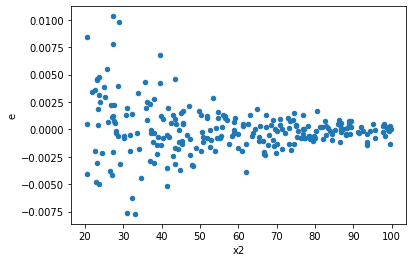

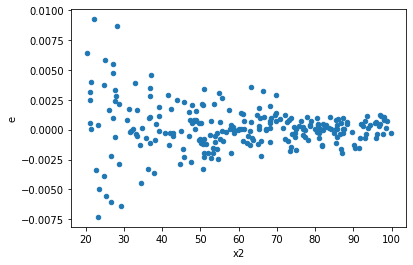

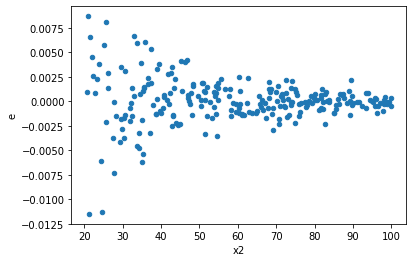

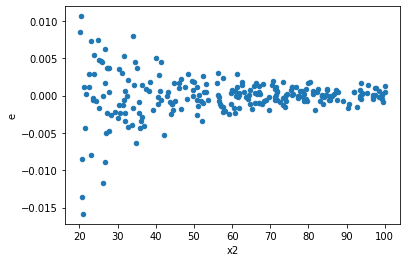

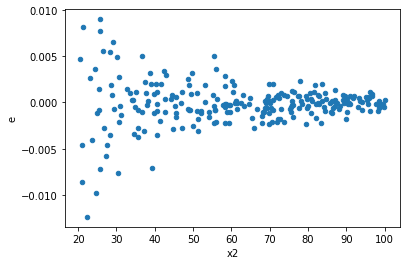

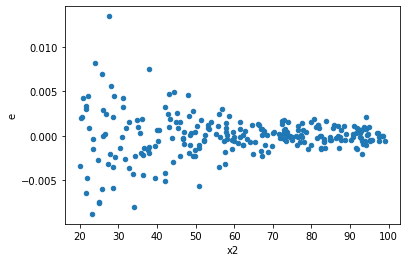

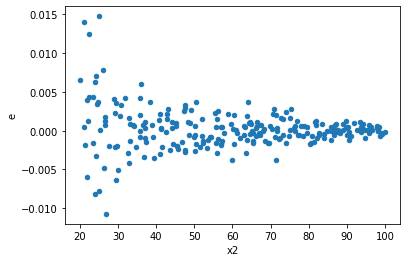

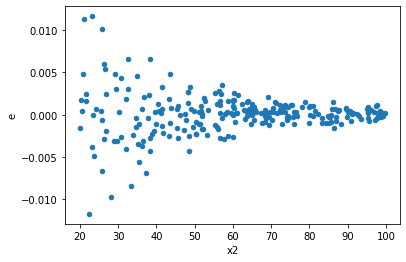

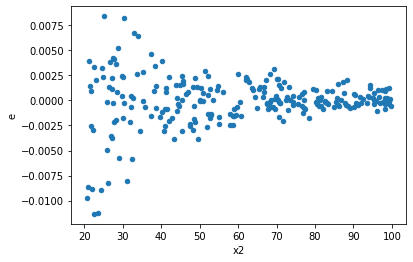

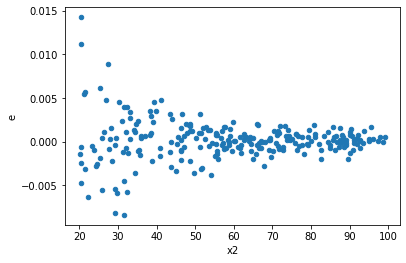

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,120.0,122.0,0.0003530129599618348,0.000900198878251712,2.9417746663486232e-06,7.378679329932065e-06,2.508240829706579,6.735154360892892e-07,0.999999663242282,3.367577180446446e-07,Reject001=0 : Heteroscedasticity
2.0,126.0,116.0,0.0004294977068305803,0.0009109749357059635,3.4087119589728597e-06,7.853232204361754e-06,2.3038708752405563,7.26211835710977e-06,0.9999963689408214,3.631059178554885e-06,Reject001=0 : Heteroscedasticity
3.0,115.0,127.0,0.0006077734788840956,0.0012924133320118393,5.284986772905179e-06,1.0176482929227082e-05,1.9255455815706852,0.0003403715640639682,0.999829814217968,0.0001701857820319841,Reject001=0 : Heteroscedasticity
4.0,138.0,104.0,0.0005048429569542275,0.0008016620640577085,3.6582822967697644e-06,7.708289077477967e-06,2.1070788015141226,8.482756484617937e-05,0.9999575862175769,4.2413782423089685e-05,Reject001=0 : Heteroscedasticity
6.0,142.0,100.0,0.0003910438010223295,0.0013613612633870925,2.7538295846642923e-06,1.3613612633870925e-05,4.943520365124737,2.4424906541753444e-15,0.9999999999999988,1.2212453270876722e-15,Reject001=0 : Heteroscedasticity
7.0,130.0,112.0,0.0004509418034884977,0.0010671687414357716,3.4687831037576747e-06,9.52829233424796e-06,2.746868872811944,8.687916985827826e-08,0.9999999565604151,4.343958492913913e-08,Reject001=0 : Heteroscedasticity
9.0,126.0,116.0,0.0005160324213162615,0.0008237967845258634,4.095495407271917e-06,7.101696418326409e-06,1.734026219567165,0.0028235982112505553,0.9985882008943747,0.0014117991056252777,Reject001=0 : Heteroscedasticity
12.0,136.0,106.0,0.0004937447451162354,0.0009924112741874068,3.6304760670311423e-06,9.362370511201951e-06,2.578827222199022,6.737205158202642e-07,0.9999996631397421,3.368602579101321e-07,Reject001=0 : Heteroscedasticity
13.0,117.0,125.0,0.0003929421291254684,0.0023065089462714575,3.3584797361151146e-06,1.845207157017166e-05,5.4941738584124655,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,122.0,0.0003530129599618348,0.000900198878251712,2.9417746663486232e-06,7.378679329932065e-06,2.508240829706579,6.735154360892892e-07,Reject001=0 : Heteroscedasticity
1.0,129.0,113.0,0.0007035790138383069,0.0002073405180525918,5.454100882467495e-06,1.8348718411733788e-06,0.33642059080199166,3.659425719960411e-09,Reject001=0 : Heteroscedasticity
2.0,126.0,116.0,0.0004294977068305803,0.0009109749357059635,3.4087119589728597e-06,7.853232204361754e-06,2.3038708752405563,7.26211835710977e-06,Reject001=0 : Heteroscedasticity
3.0,115.0,127.0,0.0006077734788840956,0.0012924133320118393,5.284986772905179e-06,1.0176482929227082e-05,1.9255455815706852,0.0003403715640639682,Reject001=0 : Heteroscedasticity
4.0,138.0,104.0,0.0005048429569542275,0.0008016620640577085,3.6582822967697644e-06,7.708289077477967e-06,2.1070788015141226,8.482756484617937e-05,Reject001=0 : Heteroscedasticity
5.0,116.0,126.0,0.0010590155382084847,0.00035712175226878726,9.12944429490073e-06,2.834299621180851e-06,0.31045697083271045,5.776155920244897e-10,Reject001=0 : Heteroscedasticity
6.0,142.0,100.0,0.0003910438010223295,0.0013613612633870925,2.7538295846642923e-06,1.3613612633870925e-05,4.943520365124737,2.4424906541753444e-15,Reject001=0 : Heteroscedasticity
7.0,130.0,112.0,0.0004509418034884977,0.0010671687414357716,3.4687831037576747e-06,9.52829233424796e-06,2.746868872811944,8.687916985827826e-08,Reject001=0 : Heteroscedasticity
8.0,127.0,115.0,0.0012316644759010095,0.00037020113199506225,9.698145479535508e-06,3.2191402782179327e-06,0.3319335933876002,2.5789066611208617e-09,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    928
Reject001=1 : Homoscedasticity       72
Name: Result_test, dtype: int64